In [2]:
import sqlite3 as sql

import numpy as np
import pandas as pd
from pandas import cut, read_sql
import pickle as pkl
from random import choices
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.optimize as optimize



In [43]:
track_cascade_dir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/Unfinished/track_mu_New_muon_test_set.csv"
energy_dir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/Unfinished/energy_New_muon_test_set.csv"

In [44]:
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/"
track_cascade = pd.read_csv(track_cascade_dir)#.sort_values('event_no').reset_index(drop = True)
energy = pd.read_csv(energy_dir)#.sort_values('event_no').reset_index(drop = True)

In [9]:
indir_db = "/groups/icecube/petersen/GraphNetDatabaseRepository/osc_next_database_new_muons_peter/Merged_db/osc_next_level3_v2.00_genie_muongun_noise_120000_140000_160000_139008_888003_retro.db"
with sql.connect(indir_db) as con:
        query = f"""
        SELECT
            event_no, energy, pid, interaction_type
        FROM 
            truth
        """
        data = read_sql(query,con)

In [45]:
print(np.shape(data))

(38885781, 4)


In [49]:
data_energy = data[data['event_no'].isin(energy['event_no'])]
print(np.shape(data_energy))
data_energy.drop(columns=['pid','interaction_type'])
energy_new = pd.merge(energy.reset_index(drop=True),data_energy.reset_index(drop=True),on='event_no',how='inner')
#data_energy = data_energy.sort_values('event_no').reset_index(drop = True)
#energy['energy'] = data_energy['energy']


(37235782, 4)


In [54]:
print(data_energy[data_energy['event_no']==21794140])
print(energy.head(2))
print(energy_new.head(2))
#energy_new = energy_new.drop(columns=['pid','interaction_type'])
print(energy_new)

          event_no     energy   pid  interaction_type
21794140  21794140  14.685727  14.0               1.0
   Unnamed: 0  energy_pred    event_no
0           0    17.948006  21794140.0
1           1    12.543299   6635665.0
   Unnamed: 0  energy_pred    event_no     energy
0           0    17.948006  21794140.0  14.685727
1           1    12.543299   6635665.0   9.670133
          Unnamed: 0  energy_pred    event_no       energy
0                  0    17.948006  21794140.0    14.685727
1                  1    12.543299   6635665.0     9.670133
2                  2    12.193014  24365311.0     6.789574
3                  3    17.239094  11910373.0    10.895575
4                  4   685.727966  12728493.0  1972.088840
...              ...          ...         ...          ...
37235777    37235777   259.981476  31416462.0   250.099309
37235778    37235778    14.046779  32069858.0    17.490920
37235779    37235779    30.609650  38642742.0    40.686083
37235780    37235780     8.823096  

In [55]:
#energy_new.to_csv(outdir+'energy_New_muon_test_set_inc_truth.csv',index=False)

In [14]:
data_track_cascade = data[data['event_no'].isin(track_cascade['event_no'].tolist())]

def categorise(row):  
    if abs(row['pid']) == 14 and row['interaction_type'] == 1:
        return 1
    else:
        return 0

data_track_cascade['track_mu'] = data_track_cascade.apply(lambda row: categorise(row), axis=1)

/tmp/ipykernel_22641/3519542000.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_track_cascade['colF'] = data_track_cascade.apply(lambda row: categorise(row), axis=1)


In [56]:

print(data_track_cascade.head(10))

   event_no    energy   pid  interaction_type  track_mu
0         0  3.170023 -14.0               1.0         1
1         1  2.751959  14.0               1.0         1
2         2  4.437488  14.0               1.0         1
3         3  1.401135  14.0               1.0         1
4         4  4.818309 -14.0               1.0         1
5         5  4.888742  14.0               1.0         1
6         6  1.715900  14.0               1.0         1
7         7  4.413545  14.0               2.0         0
8         8  1.577124  14.0               1.0         1
9         9  2.024239  14.0               1.0         1


In [57]:
#data_track_cascade.sort_values('event_no').reset_index(drop = True)
#track_cascade.sort_values('event_no').reset_index(drop = True)
#track_cascade['track_mu'] = data_track_cascade['track_mu']
track_cascade_new = pd.merge(track_cascade.reset_index(drop=True),data_track_cascade.reset_index(drop=True),on='event_no',how='inner')
track_cascade_new = track_cascade_new.drop(columns=['pid','interaction_type'])
print(track_cascade_new)

          Unnamed: 0  track_mu_pred    event_no       energy  track_mu
0                  0       0.603855  21794140.0    14.685727         1
1                  1       0.442382   6635665.0     9.670133         0
2                  2       0.462526  24365311.0     6.789574         1
3                  3       0.420581  11910373.0    10.895575         1
4                  4       0.999995  12728493.0  1972.088840         1
...              ...            ...         ...          ...       ...
37235777    37235777       0.972365  31416462.0   250.099309         1
37235778    37235778       0.531232  32069858.0    17.490920         0
37235779    37235779       0.833933  38642742.0    40.686083         1
37235780    37235780       0.427755   7800311.0    41.400131         0
37235781    37235781       0.218499   9304911.0    75.959977         0

[37235782 rows x 5 columns]


In [61]:
print(data_track_cascade[data_track_cascade['event_no']==21794140])
print(track_cascade.head(2))
print(track_cascade_new.head(2))
print(track_cascade_new.drop(columns=['energy']))

          event_no     energy   pid  interaction_type  track_mu
21794140  21794140  14.685727  14.0               1.0         1
   Unnamed: 0  track_mu_pred    event_no
0           0       0.603855  21794140.0
1           1       0.442382   6635665.0
   Unnamed: 0  track_mu_pred    event_no     energy  track_mu
0           0       0.603855  21794140.0  14.685727         1
1           1       0.442382   6635665.0   9.670133         0
          Unnamed: 0  track_mu_pred    event_no  track_mu
0                  0       0.603855  21794140.0         1
1                  1       0.442382   6635665.0         0
2                  2       0.462526  24365311.0         1
3                  3       0.420581  11910373.0         1
4                  4       0.999995  12728493.0         1
...              ...            ...         ...       ...
37235777    37235777       0.972365  31416462.0         1
37235778    37235778       0.531232  32069858.0         0
37235779    37235779       0.833933  3864

In [64]:
#track_cascade_new.to_csv(outdir+'track_cascade_New_muon_test_set_inc_truth.csv',index=False)

(array([1.104000e+03, 2.798000e+03, 5.214000e+03, 7.739000e+03,
        1.047800e+04, 1.353800e+04, 1.622400e+04, 1.939900e+04,
        2.238900e+04, 2.502400e+04, 2.784200e+04, 3.005600e+04,
        3.245100e+04, 3.449000e+04, 3.614500e+04, 3.866400e+04,
        4.017100e+04, 4.246100e+04, 4.415300e+04, 4.579400e+04,
        4.792000e+04, 4.942900e+04, 5.124100e+04, 5.389500e+04,
        5.665400e+04, 5.910500e+04, 6.188300e+04, 6.557200e+04,
        7.020900e+04, 7.432300e+04, 7.942200e+04, 8.515100e+04,
        9.200300e+04, 1.002890e+05, 1.106750e+05, 1.217080e+05,
        1.371360e+05, 1.561110e+05, 1.839370e+05, 2.284100e+05,
        2.972520e+05, 3.940280e+05, 5.118690e+05, 6.258470e+05,
        7.113740e+05, 7.474620e+05, 7.362870e+05, 6.989210e+05,
        6.465910e+05, 5.922270e+05, 5.331830e+05, 4.712010e+05,
        4.059630e+05, 3.484040e+05, 2.982540e+05, 2.591760e+05,
        2.289110e+05, 2.053910e+05, 1.851440e+05, 1.692570e+05,
        1.552960e+05, 1.438210e+05, 1.32

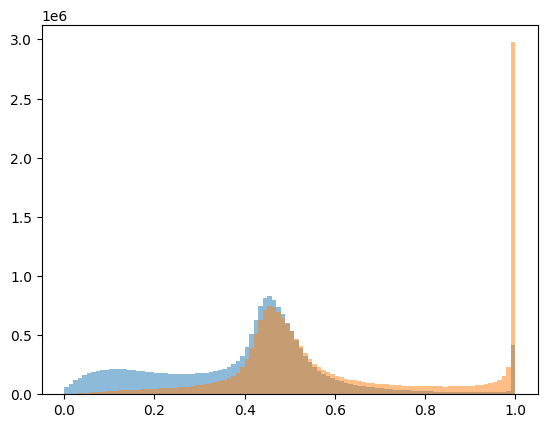

In [63]:
cascades = track_cascade_new['event_no'][track_cascade_new['track_mu']==0]
tracks = track_cascade_new['event_no'][track_cascade_new['track_mu']==1]
#plt.hist(track_cascade['track_mu_pred'][track_cascade['track_mu']==1],bins=100)
plt.hist(track_cascade_new['track_mu_pred'][track_cascade_new['event_no'].isin(cascades.to_list())],bins=100,alpha=0.5)
plt.hist(track_cascade_new['track_mu_pred'][track_cascade_new['event_no'].isin(tracks.to_list())],bins=100,alpha=0.5)

(array([  62908.,   88190.,  121920.,  148852.,  172262.,  191322.,
         206153.,  218575.,  228056.,  234513.,  240491.,  243331.,
         244492.,  244357.,  243051.,  243009.,  240507.,  239195.,
         235700.,  233689.,  230973.,  228945.,  228425.,  228969.,
         228888.,  230516.,  232698.,  236346.,  242193.,  250065.,
         258093.,  268248.,  281186.,  296490.,  317453.,  338545.,
         368556.,  408079.,  465040.,  555875.,  697928.,  899663.,
        1140197., 1371593., 1527647., 1578155., 1535077., 1438266.,
        1321540., 1196035., 1065797.,  933074.,  796116.,  675732.,
         572032.,  491240.,  427712.,  379781.,  338519.,  305602.,
         276483.,  253501.,  231352.,  214371.,  197989.,  184534.,
         172309.,  161645.,  151942.,  143765.,  135460.,  129391.,
         123399.,  117825.,  113069.,  108858.,  104873.,  100898.,
          97697.,   95030.,   92814.,   91399.,   89093.,   87760.,
          86237.,   85775.,   85196.,   85532., 

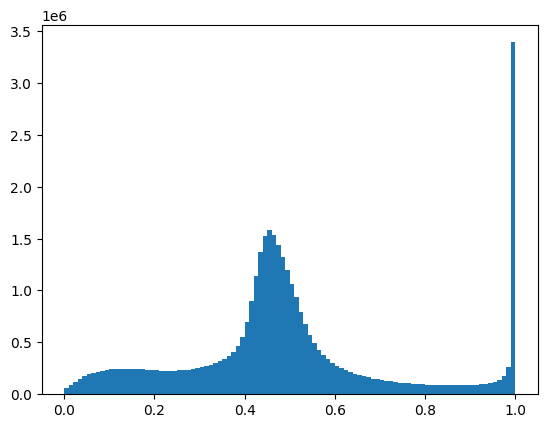

In [27]:
track_cascade_old = pd.read_csv("/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/Unfinished/track_mu_New_muon_test_set.csv")

In [32]:
print(track_cascade_old.sort_values('event_no'))
print(track_cascade_old)

          Unnamed: 0  track_mu_pred    event_no
15872425    15872425       0.448105         0.0
8488513      8488513       0.549197         1.0
3514308      3514308       0.449152         2.0
14889784    14889784       0.471418         3.0
28688165    28688165       0.458505         4.0
...              ...            ...         ...
10367224    10367224       0.999980  38885776.0
4388997      4388997       0.148725  38885777.0
10062375    10062375       0.083122  38885778.0
25062011    25062011       0.038035  38885779.0
23901573    23901573       0.117126  38885780.0

[37235782 rows x 3 columns]
          Unnamed: 0  track_mu_pred    event_no
0                  0       0.603855  21794140.0
1                  1       0.442382   6635665.0
2                  2       0.462526  24365311.0
3                  3       0.420581  11910373.0
4                  4       0.999995  12728493.0
...              ...            ...         ...
37235777    37235777       0.972365  31416462.0
37235778   

In [31]:
print(track_cascade)

          Unnamed: 0  track_mu_pred    event_no  track_mu
0           15872425       0.448105         0.0       1.0
1            8488513       0.549197         1.0       1.0
2            3514308       0.449152         2.0       1.0
3           14889784       0.471418         3.0       1.0
4           28688165       0.458505         4.0       1.0
...              ...            ...         ...       ...
37235777    10367224       0.999980  38885776.0       0.0
37235778     4388997       0.148725  38885777.0       0.0
37235779    10062375       0.083122  38885778.0       0.0
37235780    25062011       0.038035  38885779.0       0.0
37235781    23901573       0.117126  38885780.0       0.0

[37235782 rows x 4 columns]


(array([   5885.,   11892.,   17903.,   23061.,   27989.,   32900.,
          37013.,   40918.,   44493.,   47784.,   50632.,   52911.,
          55193.,   56832.,   58346.,   60749.,   61423.,   63581.,
          64570.,   65887.,   67098.,   68232.,   70249.,   72423.,
          74691.,   77168.,   79888.,   83234.,   88353.,   92742.,
          97886.,  104009.,  111359.,  120531.,  131762.,  144020.,
         160592.,  181784.,  212409.,  261476.,  337570.,  444582.,
         573543.,  698477.,  790569.,  828616.,  813638.,  770601.,
         711816.,  651335.,  585108.,  516261.,  443931.,  380057.,
         324469.,  281485.,  248133.,  222032.,  199756.,  182289.,
         166668.,  154254.,  142146.,  133198.,  124019.,  117283.,
         110600.,  105278.,   99636.,   95271.,   90750.,   88059.,
          84445.,   81110.,   78859.,   77162.,   75217.,   73053.,
          71430.,   69814.,   69463.,   69094.,   67898.,   67761.,
          67143.,   67627.,   67834.,   68826., 

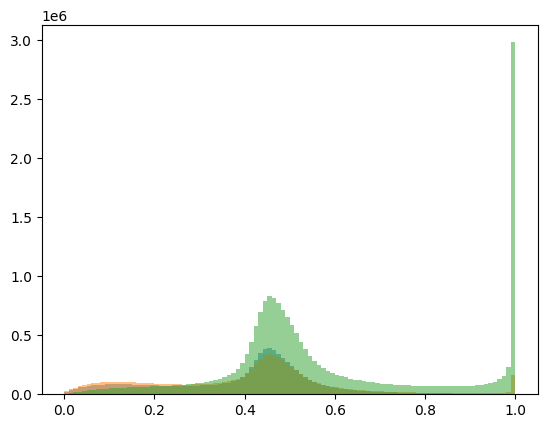

In [38]:
electron_neutrinos = data['event_no'][data['pid'].isin((12,-12))]
tau_neutrinos = data['event_no'][data['pid'].isin((16,-16))]
muon_neutrinos = data['event_no'][data['pid'].isin((14,-14))]
plt.hist(track_cascade_old['track_mu_pred'][track_cascade_old['event_no'].isin(electron_neutrinos.to_list())],bins=100,alpha=0.5)
plt.hist(track_cascade_old['track_mu_pred'][track_cascade_old['event_no'].isin(tau_neutrinos.to_list())],bins=100,alpha=0.5)
plt.hist(track_cascade_old['track_mu_pred'][track_cascade_old['event_no'].isin(muon_neutrinos.to_list())],bins=100,alpha=0.5)


(array([  31655.,   44128.,   60689.,   74521.,   86169.,   95897.,
         103375.,  109361.,  114101.,  116976.,  120153.,  121123.,
         121794.,  121890.,  120937.,  120836.,  119432.,  118839.,
         117429.,  115921.,  114722.,  113831.,  113308.,  113295.,
         113516.,  114119.,  115018.,  116550.,  119434.,  123428.,
         128171.,  131826.,  138682.,  146189.,  156815.,  166679.,
         181446.,  201619.,  229146.,  273012.,  344950.,  444327.,
         563676.,  678179.,  754840.,  779188.,  756289.,  707786.,
         651495.,  588412.,  523712.,  459145.,  392316.,  332090.,
         280764.,  241478.,  210372.,  186503.,  166001.,  149590.,
         135971.,  124802.,  113959.,  105123.,   97042.,   90727.,
          84521.,   79447.,   74690.,   70731.,   66736.,   63543.,
          60412.,   57997.,   55522.,   53353.,   51563.,   49423.,
          47701.,   46664.,   45283.,   44504.,   43526.,   42751.,
          42190.,   41841.,   41429.,   41641., 

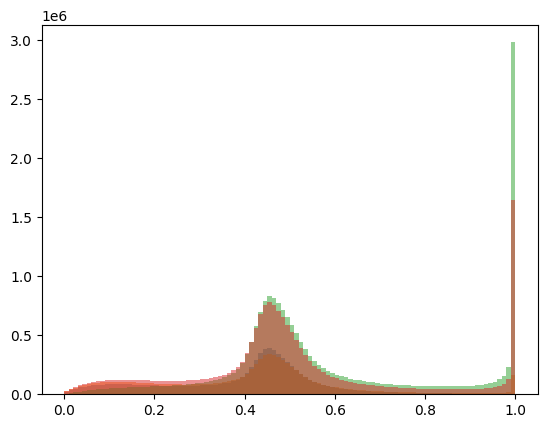

In [41]:
plt.hist(track_cascade['track_mu_pred'][track_cascade['event_no'].isin(electron_neutrinos.to_list())],bins=100,alpha=0.5)
plt.hist(track_cascade['track_mu_pred'][track_cascade['event_no'].isin(tau_neutrinos.to_list())],bins=100,alpha=0.5)
plt.hist(track_cascade['track_mu_pred'][track_cascade['event_no'].isin(muon_neutrinos.to_list())],bins=100,alpha=0.5)
plt.hist(track_cascade['track_mu_pred'][track_cascade['event_no'].isin(cascades.to_list())],bins=100,alpha=0.5)

In [65]:
indir_db = "/groups/icecube/petersen/GraphNetDatabaseRepository/osc_next_database_new_muons_peter/Merged_db/osc_next_level3_v2.00_genie_muongun_noise_120000_140000_160000_139008_888003_retro.db"
with sql.connect(indir_db) as con:
        query = f"""
        SELECT
            event_no, osc_weight
        FROM 
            retro
        """
        data = read_sql(query,con)

In [66]:
outdir_osc_weight = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/"
data.to_csv(outdir_osc_weight + 'osc_weights_new_muon.csv',index=False)

In [67]:
print(np.shape(data))
print(data.head(10))

(38885781, 2)
   event_no    osc_weight
0         0  6.033881e-07
1         1  4.399224e-07
2         2  6.264433e-07
3         3  5.370429e-07
4         4  7.690798e-07
5         5  5.588442e-07
6         6  1.137362e-07
7         7  6.321130e-07
8         8  3.858035e-07
9         9  2.590266e-07


In [4]:
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/"
zenith_in = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/Unfinished/zenith_New_muon_test_set.parquet"
zenith_old = pd.read_parquet(zenith_in).reset_index(drop=True)

In [6]:
indir_db = "/groups/icecube/petersen/GraphNetDatabaseRepository/osc_next_database_new_muons_peter/Merged_db/osc_next_level3_v2.00_genie_muongun_noise_120000_140000_160000_139008_888003_retro.db"
with sql.connect(indir_db) as con:
        query = f"""
        SELECT
            event_no, zenith
        FROM 
            truth
        """
        data = read_sql(query,con)

In [7]:
zenith_new = pd.merge(zenith_old.reset_index(drop=True),data.reset_index(drop=True),on='event_no',how='inner')
print(zenith_new)

          zenith_pred  zenith_kappa    event_no    zenith
0            2.256744      6.909912  21794140.0  2.659752
1            1.420821      3.184246   6635665.0  2.515093
2            1.920733      5.090563  24365311.0  1.113448
3            0.723789      7.141128  11910373.0  0.295836
4            1.588571     99.971237  12728493.0  1.410424
...               ...           ...         ...       ...
37235777     1.925241     54.753761  31416462.0  1.775931
37235778     2.491177      8.046426  32069858.0  2.418797
37235779     1.743038     13.644675  38642742.0  1.386733
37235780     1.508515      5.477738   7800311.0  1.841782
37235781     1.279022     27.381962   9304911.0  0.740745

[37235782 rows x 4 columns]


In [8]:
print(data[data['event_no']==6635665])

         event_no    zenith
6635665   6635665  2.515093


In [9]:
zenith_new.to_csv(outdir + 'zenith_New_muon_test_set.csv',index=False)

: 